# Data Description

I have chosen [ERA5-land hourly data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=form) for my project. 
The objective is to find useful information about the weather in the Konkan area of Maharashtra, which receives the highest rainfall, leading to the floods. If we are able to find useful patterns in the data that could help us forecast the precipitation in the future, even by an hour, it could help the people to better prepare for the flood. 

- The data is in `netCDF` file format. Hence, we can use `xarray` to read the data.

**Floods in Mahad**
- My hometown is Mahad, a small town in the Konkan district of Maharashtra, India. 
- On July 21 and July 22, 2021, the torrential rains had left `94` houses completely damaged and `9649` partially wrecked.
- About `3709` houses were damaged. 
- The landslide in **Taliye** village in the Mahad tehshil killed at least 84 people.

**The parameters that I have chosen are:**
- `10m_v_component_of_wind` or `v10` : northward component of the 10m wind, in `m/s` units, moving at a height of 10m above the surface,
- `2m_temperature` or `t2m`: the temperature of air at 2m above the surface, in `Kelvin` units,
- `surface_net_solar_radiation` or `ssr`: the amount of solar radiation that reaches a horizontal plane at the surface minus the amount reflected by the Earth's surface, in `W/m^2` units,
- `surface_pressure` or `sp`: pressue of the atmosphere on the surface of land, in `Pa` units,
- `total_precipitation` or `tp`: the accumulated liquid and frozen water, comprising rain and snow, that falls to the surface in `m` units.

**Further information about the floods in Mahad and the havoc it caused**
- https://www.business-standard.com/article/current-affairs/maha-over-9-700-houses-45-buildings-damaged-in-mahad-due-to-july-floods-121081301002_1.html#:~:text=A%20total%20of%2045%20buildings,occurred%20on%20July%2021%2D22. 



# Install required libraries and [Contourf and cartopy issues resolved](https://linuxtut.com/en/8f0d69169dc6ab753e08/)

In [1]:
!pip install xarray
!pip install cartopy

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.19.0

!pip list | grep Shapely

     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 30.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516284 sha256=79b5a89953a63f0db13fe2a18d086d10de066a3a5619f997540beeb7bcdb467b
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy
deb-src h

# Install libraries

In [19]:
import numpy as np  # import numpy package 
import matplotlib.pyplot as plt # function in matplotlib that produces quick and easy plots
import pandas as pd # load the Pandas module, which is a library for data manipulation of 2 dimensional data
import xarray as xr # load the xarray module, which is a library for data manipulation of N dimensional data
import cartopy.crs as ccrs # Cartopy map projections
import cartopy.feature as cfeature # Cartopy map features
from cartopy.util import add_cyclic_point
import cartopy
import warnings 
warnings.filterwarnings('ignore')

# Load data

* The data 'download.nc' had been downloaded using the 'data_collection.ipynb' file. I kept it as a separate file, because the website might keep changing the format of the data, time to time. I want the results to be consistent.


In [3]:
# open_dataset is one of the main functions in Xarray to open a Netcdf file.  
data = xr.open_dataset('download.nc') # open the dataset
data 

<xarray.Dataset>
Dimensions:    (latitude: 61, longitude: 71, time: 792)
Coordinates:
  * longitude  (longitude) float32 72.0 72.1 72.2 72.3 ... 78.7 78.8 78.9 79.0
  * latitude   (latitude) float32 22.0 21.9 21.8 21.7 ... 16.3 16.2 16.1 16.0
  * time       (time) datetime64[ns] 2019-07-14 ... 2021-07-24T23:00:00
Data variables:
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    ssr        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-23 20:02:03 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

# Let's evaluate variables and coordinates - always a good first step

## Dimensions of each variable

In [4]:
# What are the dimensions of the five data variables - specifically, the named coordinates associated with them?
print(f"The dimensions of the v10 variable are: {data.v10.dims}")
print(f"The dimensions of the t2m variable are: {data.t2m.dims}")
print(f"The dimensions of the ssr variable are: {data.ssr.dims}")
print(f"The dimensions of the sp variable are: {data.sp.dims}")
print(f"The dimensions of the tp variable are: {data.tp.dims}")

The dimensions of the v10 variable are: ('time', 'latitude', 'longitude')
The dimensions of the t2m variable are: ('time', 'latitude', 'longitude')
The dimensions of the ssr variable are: ('time', 'latitude', 'longitude')
The dimensions of the sp variable are: ('time', 'latitude', 'longitude')
The dimensions of the tp variable are: ('time', 'latitude', 'longitude')


## Coordinates of each variable

In [5]:
# coordinate variables
print(data.coords)

Coordinates:
  * longitude  (longitude) float32 72.0 72.1 72.2 72.3 ... 78.7 78.8 78.9 79.0
  * latitude   (latitude) float32 22.0 21.9 21.8 21.7 ... 16.3 16.2 16.1 16.0
  * time       (time) datetime64[ns] 2019-07-14 ... 2021-07-24T23:00:00


## Direction of latitude and longitude

In [8]:
# Is the longitude coordinates in the 0 to 360 E system, or the 180 W to 180 E system?
print(data['longitude'])
print('\n')
print(data['latitude'])
# a description of the direction of the order of each of the spatial coordinates (northward? southward? eastward? westward?)
print(f"The longitude coordinate is eastward")
print(f"The latitude coordinate is northward")

<xarray.DataArray 'longitude' (longitude: 71)>
array([72. , 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73. , 73.1,
       73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74. , 74.1, 74.2, 74.3,
       74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75. , 75.1, 75.2, 75.3, 75.4, 75.5,
       75.6, 75.7, 75.8, 75.9, 76. , 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7,
       76.8, 76.9, 77. , 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9,
       78. , 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79. ],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 72.0 72.1 72.2 72.3 ... 78.7 78.8 78.9 79.0
Attributes:
    units:      degrees_east
    long_name:  longitude


<xarray.DataArray 'latitude' (latitude: 61)>
array([22. , 21.9, 21.8, 21.7, 21.6, 21.5, 21.4, 21.3, 21.2, 21.1, 21. , 20.9,
       20.8, 20.7, 20.6, 20.5, 20.4, 20.3, 20.2, 20.1, 20. , 19.9, 19.8, 19.7,
       19.6, 19.5, 19.4, 19.3, 19.2, 19.1, 19. , 18.9, 18.8, 18.7, 18.6, 18.5,
       18.4, 18.3, 1

# Separating data according to the year

In [9]:
# let's separate the data according to years
data_2019 = data.sel(time=data.time.dt.year == 2019)
data_2020 = data.sel(time=data.time.dt.year == 2020)
data_2021 = data.sel(time=data.time.dt.year == 2021)

## Units of each variable


In [10]:
print(f"The units of the v10 variable are: {data.v10.units}")
print(f"The units of the t2m variable are: {data.t2m.units}")
print(f"The units of the ssr variable are: {data.ssr.units}")
print(f"The units of the sp variable are: {data.sp.units}")
print(f"The units of the tp variable are: {data.tp.units}")

The units of the v10 variable are: m s**-1
The units of the t2m variable are: K
The units of the ssr variable are: J m**-2
The units of the sp variable are: Pa
The units of the tp variable are: m


## Handling missing values in data

In [11]:
# check if the data has missing values and if it does, how many?
print(f"The number of missing values in the v10 variable is: {data.v10.isnull().sum()}")
print(f"The number of missing values in the t2m variable is: {data.t2m.isnull().sum()}")
print(f"The number of missing values in the ssr variable is: {data.ssr.isnull().sum()}")
print(f"The number of missing values in the sp variable is: {data.sp.isnull().sum()}")
print(f"The number of missing values in the tp variable is: {data.tp.isnull().sum()}")

The number of missing values in the v10 variable is: <xarray.DataArray 'v10' ()>
array(463320)
The number of missing values in the t2m variable is: <xarray.DataArray 't2m' ()>
array(463320)
The number of missing values in the ssr variable is: <xarray.DataArray 'ssr' ()>
array(463321)
The number of missing values in the sp variable is: <xarray.DataArray 'sp' ()>
array(463320)
The number of missing values in the tp variable is: <xarray.DataArray 'tp' ()>
array(463320)


In [17]:
# total number of data points
print(f"The total number of data points is: {data.v10.size}")

The total number of data points is: 3430152


## Mask the total precipitation data

In [45]:
# create a mask that identifies and masks out NaNs, and save your masked variable to a new variable
masked_precip = np.ma.masked_invalid(data.tp.values)

In [48]:
# for each year, get a masked_precip 
masked_precip_2019 = np.ma.masked_invalid(data_2019.tp.values)
masked_precip_2020 = np.ma.masked_invalid(data_2020.tp.values)
masked_precip_2021 = np.ma.masked_invalid(data_2021.tp.values)

In [46]:
# print out the masked variable, the mask itself, and original data
print(f"The masked precip array is: {masked_precip}")
print(f"The mask of the masked precip array is: {masked_precip.mask}")
print(f"The original precip array is: {masked_precip.data}")

The masked precip array is: [[[0.00010680407285690308 0.00016783922910690308 0.000217437744140625
   ... 5.7213008403778076e-05 3.4324824810028076e-05
   1.9066035747528076e-05]
  [0.00016402453184127808 0.000213623046875 -- ...
   4.5768916606903076e-05 2.6695430278778076e-05 1.9066035747528076e-05]
  [0.000225067138671875 0.0002593994140625 0.0002899169921875 ...
   3.8139522075653076e-05 2.2880733013153076e-05 1.5251338481903076e-05]
  ...
  [-- -- -- ... 0.000537872314453125 0.00048828125 0.000438690185546875]
  [-- -- -- ... 0.000514984130859375 0.000453948974609375
   0.00038909912109375]
  [-- -- -- ... 0.0003662109375 0.000301361083984375 0.00023651123046875]]

 [[-7.450580596923828e-09 -7.450580596923828e-09 -7.450580596923828e-09
   ... -7.450580596923828e-09 -7.450580596923828e-09
   -7.450580596923828e-09]
  [-7.450580596923828e-09 -7.450580596923828e-09 -- ...
   -7.450580596923828e-09 -7.450580596923828e-09 -7.450580596923828e-09]
  [-7.450580596923828e-09 -7.450580596923

In [47]:
# get the shape of the masked precip array
masked_precip.shape

(792, 61, 71)

In [49]:
# get the maximum precipitation at each location for 2021 year
max_precip_2021 = np.max(masked_precip_2021, axis=0)
# print the shape of the max_precip_2021 array
print(f"The shape of the max_precip_2021 array is: {max_precip_2021.shape}")

The shape of the max_precip_2021 array is: (61, 71)


# Max Daily Precipitation on July 22, 2021

## Total Precipitation on July 22, 2021

In [33]:
# Get the total precipitation data on July 22
tp_2021 = data_2021.tp.sel(time=data_2021.time.dt.month == 7).sel(time=data_2021.time.dt.day == 22)
tp_2021



<xarray.DataArray 'tp' (time: 24, latitude: 61, longitude: 71)>
[103944 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 72.0 72.1 72.2 72.3 ... 78.7 78.8 78.9 79.0
  * latitude   (latitude) float32 22.0 21.9 21.8 21.7 ... 16.3 16.2 16.1 16.0
  * time       (time) datetime64[ns] 2021-07-22 ... 2021-07-22T23:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

## Maximum daily precipitation

In [34]:
# get the max daily precipitation for tp_2021
tp_2021_max = tp_2021.max(dim='time')
tp_2021_max

<xarray.DataArray 'tp' (latitude: 61, longitude: 71)>
array([[0.00091173, 0.00107194, 0.00165942, ..., 0.04946999, 0.0426835 ,
        0.05012613],
       [0.0010872 , 0.00119783,        nan, ..., 0.05748864, 0.04825689,
        0.0525714 ],
       [0.00120164, 0.00115205, 0.00145724, ..., 0.06438194, 0.05550878,
        0.05563466],
       ...,
       [       nan,        nan,        nan, ..., 0.03684308, 0.03666761,
        0.03672483],
       [       nan,        nan,        nan, ..., 0.03783111, 0.03776626,
        0.03688123],
       [       nan,        nan,        nan, ..., 0.0389641 , 0.03800277,
        0.03567576]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 72.0 72.1 72.2 72.3 ... 78.7 78.8 78.9 79.0
  * latitude   (latitude) float32 22.0 21.9 21.8 21.7 ... 16.3 16.2 16.1 16.0

## Plot on the map

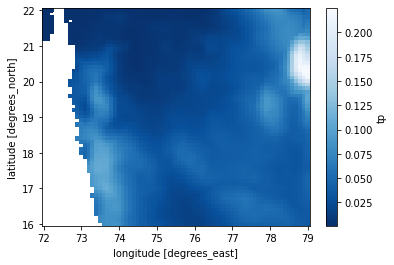

In [35]:
tp_2021_max.plot(cmap='Blues_r')

- The values where we see white space is the coastline of Maharashtra. 
- The most average daily precipitation that we see is in the middle and the west part of the plot. That's the Konkan area. 

# Daily Precipitation data at the gridpoint nearest Mahad (latitude: 18.1, longitude: 73.4)

In [26]:
lat = data.latitude.values
lon = data.longitude.values
# Find the indices of the nearest gridpoint to Mahad. Save these indices to new variables, and print out the values. 
lat_mahad = 18.1
# longitude of mahad in eastward
lon_mahad = 73.4
# find the indices of the nearest gridpoint to mahad
lat_ind = np.abs(lat - lat_mahad).argmin()
lon_ind = np.abs(lon - lon_mahad).argmin()
# print the values of the indices
print(f"The latitude index of the nearest gridpoint to Mahad is: {lat_ind}")
print(f"The longitude index of the nearest gridpoint to Mahad is: {lon_ind}")


The latitude index of the nearest gridpoint to Mahad is: 39
The longitude index of the nearest gridpoint to Mahad is: 14


## Lat/long of that gridpoint

In [27]:
# Print the corresponding lat/lon of that gridpoint.
print(f"The corresponding lat/lon of that gridpoint is: {lat[lat_ind]}, {lon[lon_ind]}")

The corresponding lat/lon of that gridpoint is: 18.100000381469727, 73.4000015258789


# data_mahad

In [28]:
# Index your data so that you are only accessing data at this special location.
data_mahad = data.sel(latitude=lat[lat_ind], longitude=lon[lon_ind])
data_mahad

<xarray.Dataset>
Dimensions:    (time: 792)
Coordinates:
    longitude  float32 73.4
    latitude   float32 18.1
  * time       (time) datetime64[ns] 2019-07-14 ... 2021-07-24T23:00:00
Data variables:
    v10        (time) float32 1.36 1.185 1.429 1.556 ... 1.346 1.259 1.416 1.26
    t2m        (time) float32 297.5 297.5 298.0 298.2 ... 297.6 297.4 297.1
    ssr        (time) float32 1.141e+07 6.582e+03 ... 9.002e+06 9.002e+06
    sp         (time) float32 1.003e+05 1.003e+05 ... 9.993e+04 9.995e+04
    tp         (time) float32 0.01479 0.0007439 0.001312 ... 0.0199 0.02092
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-23 20:02:03 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

## Line plot of total precipitation

### 2019 plot

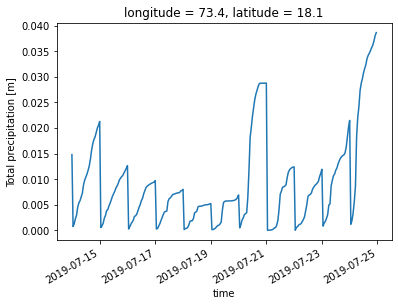

In [40]:
# make a line plot of all the total precip at this location, for all three years separately
data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).plot()

### 2020 plot

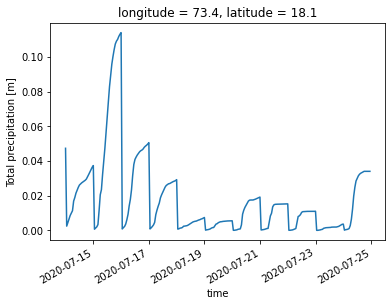

In [42]:
data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).plot()


### 2021 plot

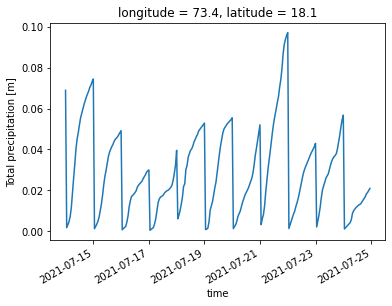

In [43]:
data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).plot()

# Basic Statistics

## Max

In [44]:
# get the maximum total precip for each year
tp_2019_max = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).max(dim='time')
tp_2020_max = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).max(dim='time')
tp_2021_max = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).max(dim='time')
print(f"The maximum total precip for 2019 is: {tp_2019_max.values}")
print(f"The maximum total precip for 2020 is: {tp_2020_max.values}")
print(f"The maximum total precip for 2021 is: {tp_2021_max.values}")


The maximum total precip for 2019 is: 0.038647472858428955
The maximum total precip for 2020 is: 0.11406556516885757
The maximum total precip for 2021 is: 0.09719663858413696


## Min

In [51]:
# get the minimum total precip for each year
tp_2019_min = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).min(dim='time')
tp_2020_min = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).min(dim='time')
tp_2021_min = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).min(dim='time')
print(f"The minimum total precip for 2019 is: {tp_2019_min.values}")   
print(f"The minimum total precip for 2020 is: {tp_2020_min.values}")
print(f"The minimum total precip for 2021 is: {tp_2021_min.values}")

The minimum total precip for 2019 is: 1.5251338481903076e-05
The minimum total precip for 2020 is: 1.1436641216278076e-05
The minimum total precip for 2021 is: 0.000457763671875


## Standard deviation



In [52]:
# get the standard deviation of total precip for each year
tp_2019_std = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).std(dim='time')
tp_2020_std = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).std(dim='time')
tp_2021_std = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).std(dim='time')
print(f"The standard deviation of total precip for 2019 is: {tp_2019_std.values}")
print(f"The standard deviation of total precip for 2020 is: {tp_2020_std.values}")
print(f"The standard deviation of total precip for 2021 is: {tp_2021_std.values}")

The standard deviation of total precip for 2019 is: 0.009008652530610561
The standard deviation of total precip for 2020 is: 0.02299460768699646
The standard deviation of total precip for 2021 is: 0.02097214013338089


## Mean

In [53]:
# get the mean of total precip for each year
tp_2019_mean = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).mean(dim='time')
tp_2020_mean = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).mean(dim='time')
tp_2021_mean = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).mean(dim='time')
print(f"The mean of total precip for 2019 is: {tp_2019_mean.values}")
print(f"The mean of total precip for 2020 is: {tp_2020_mean.values}")
print(f"The mean of total precip for 2021 is: {tp_2021_mean.values}")


The mean of total precip for 2019 is: 0.00919452402740717
The mean of total precip for 2020 is: 0.017825091257691383
The mean of total precip for 2021 is: 0.028783045709133148


## Interquartile range

In [54]:
# get the iqr of total precip for each year
tp_2019_iqr = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).quantile(0.75) - data_mahad.tp.sel(time=data_mahad.time.dt.year == 2019).quantile(0.25)
tp_2020_iqr = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).quantile(0.75) - data_mahad.tp.sel(time=data_mahad.time.dt.year == 2020).quantile(0.25)
tp_2021_iqr = data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).quantile(0.75) - data_mahad.tp.sel(time=data_mahad.time.dt.year == 2021).quantile(0.25)
print(f"The iqr of total precip for 2019 is: {tp_2019_iqr.values}")
print(f"The iqr of total precip for 2020 is: {tp_2020_iqr.values}")
print(f"The iqr of total precip for 2021 is: {tp_2021_iqr.values}")


The iqr of total precip for 2019 is: 0.008935155346989632
The iqr of total precip for 2020 is: 0.02425815351307392
The iqr of total precip for 2021 is: 0.03104749694466591
